## Punto 3
Cargamos primero los paquetes necesarios para cada función así como para graficar la función $f$:

In [1]:
import math
from numpy import sign
import numpy as np
import matplotlib.pyplot as plt

Escríbimos cada función de tal forma que nos devuelva la raíz, el número de iteraciones que realizó y una lista con los valores de la raíz en cada iteración. Para cada método usado se específica la tolerancia de $10^{-50}$:

In [2]:
def bisection(f,x1,x2,switch=1,tol=1.0e-50):
    sol=[]
    f1 = f(x1)
    if f1 == 0.0: return x1
    f2 = f(x2)
    if f2 == 0.0: return x2
    if sign(f1) == sign(f2):
        error.err('La raíz no está acotada.')
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
    
    for i in range(n):
        sol.append((x1 + x2)/2.0)
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) > abs(f1)) \
                         and (abs(f3) > abs(f2)):
            return None
        if f3 == 0.0: return x3, n, sol
        if sign(f2)!= sign(f3): x1 = x3; f1 = f3
        else: x2 = x3; f2 = f3
    return (x1 + x2)/2.0, n, sol

def ridder(f,a,b,tol=1.0e-50):
    sol=[]
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    for i in range(30):
        #Calcula la raíz mejorada x con la fórmula de Ridder
        c = 0.5*(a + b); fc = f(c)
        s = math.sqrt(fc**2 - fa*fb)
        if s == 0.0: return None
        dx = (c - a)*fc/s
        if (fa - fb) < 0.0: dx = -dx
        x = c + dx; fx = f(x)
        sol.append(x)
        #Prueba de convergencia
        if i > 0:
            if abs(x - xOld) < tol*max(abs(x),1.0): return x, i, sol
        xOld = x
        #Re-acota la raíz lo más cerca posible
        if sign(fc) == sign(fx):
            if sign(fa)!= sign(fx): b = x; fb = fx
            else: a = x; fa = fx
        else:
            a = c; b = x; fa = fc; fb = fx
    return None 
    print('Muchas iteraciones')
    
def newtonraphson(x,tol=1.0e-50):
    sol=[]
    for i in range(100):
        dx = -f(x)/df(x)
        x = x + dx
        sol.append(x)
        if abs(dx) < tol: return x,i, sol
    print ('Muchas iteraciones')
    return sol

Procedemos ahora a declarar la función $f(x)=e^{x/3}-(x+5)$ y realizamos su gráfica:

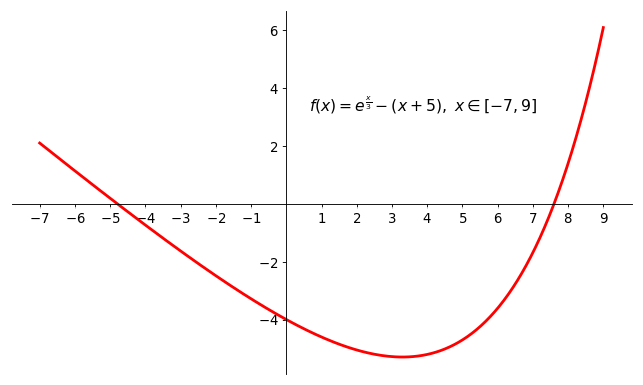

In [3]:
def f(x):
    return math.exp(x/3)-(x+5)
X=np.linspace(-7, 9, 250, endpoint=True)
fX=np.zeros(len(X))
for i in range(len(X)):
    fX[i]=f(X[i])
plt.figure(figsize=(10,6), dpi=80)
plt.xticks([-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9],
       [r'$-7$', r'$-6$',r'$-5$', r'$-4$', r'$-3$', r'$-2$', r'$-1$',r'$1$',r'$2$',r'$3$',r'$4$',r'$5$',r'$6$',r'$7$',r'$8$',r'$9$'])
plt.yticks([-4,-2,2,4,6],
       [r'$-4$',r'$-2$',r'$2$',r'$4$',r'$6$'])
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.plot(X, fX, color="red", linewidth=2.5, linestyle="-")
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))
plt.annotate(r'$f(x)=e^{\frac{x}{3}}-(x+5),\ x\in [-7,9]$',xy=(0.5,3),xytext=(5,5), textcoords='offset points', fontsize=14)
plt.show()

Gracias a la gráfica de $f$ podemos establecer con certeza los intervalos en que están las dos raíces de la función: $[-5,4]$ y $[7,8]$. No hay más raíces aparte de las señaladas puesto que la función es concáva hacía arriba en todo $\mathbb{R}$.

Los métodos que vamos a usar para determinar las raíces son el de bisección, el de Ridder y el de Newton-Raphson; para el método de bisección tenemos para la primera raíz:

In [4]:
raíz,it,sol=bisection(f, -5.0, -4.0)
print("La raíz en este intervalo es:",raíz)
print("Se realizaron",it,"iteraciones")

La raíz en este intervalo es: -4.79796658944738
Se realizaron 167 iteraciones


Veamos ahora si el orden de convergencia se ajusta a la teoría: la siguiente es la lista de los errores entre cada iteración sucesiva

In [5]:
e=[]
for i in range(len(sol)-1):
    e.append(abs(sol[i+1]-sol[i]))    
print(e)

[0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 7.450580596923828e-09, 3.725290298461914e-09, 1.862645149230957e-09, 9.313225746154785e-10, 4.656612873077393e-10, 2.3283064365386963e-10, 1.1641532182693481e-10, 5.820766091346741e-11, 2.9103830456733704e-11, 1.4551915228366852e-11, 7.275957614183426e-12, 3.637978807091713e-12, 1.8189894035458565e-12, 9.094947017729282e-13, 4.547473508864641e-13, 2.2737367544323206e-13, 1.1368683772161603e-13, 5.684341886080802e-14, 2.842170943040401e-14, 1.4210854715202004e-14, 7.105427357601002e-15, 3.552713678800501e-15, 1.7763568394002505e-15, 8.881784197001252e-16, 8.881784197001252e-16, 0.

Se supone que el método de bisección presenta un orden de convergencia lineal, verifiquemoslo diviendo cada error entre el anterior (para aquellos que no sean cero):

In [6]:
con=[]
for i in range (len(e)-1):
    if e[i]!=0 and e[i+1]!=0:
        con.append(e[i+1]/e[i])
print(con)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0]


De esta forma, se comprueba lo establecido por la teoría. Procedamos de forma análoga para el otro intervalo:

In [7]:
raíz,it,sol=bisection(f,7.0,8.0)
print("La raíz en este intervalo es:",raíz)
print("Se realizaron",it,"iteraciones")

La raíz en este intervalo es: 7.6014311795590785
Se realizaron 167 iteraciones


In [8]:
e=[]
for i in range(len(sol)-1):
    e.append(abs(sol[i+1]-sol[i]))    
print(e)

[0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 7.450580596923828e-09, 3.725290298461914e-09, 1.862645149230957e-09, 9.313225746154785e-10, 4.656612873077393e-10, 2.3283064365386963e-10, 1.1641532182693481e-10, 5.820766091346741e-11, 2.9103830456733704e-11, 1.4551915228366852e-11, 7.275957614183426e-12, 3.637978807091713e-12, 1.8189894035458565e-12, 9.094947017729282e-13, 4.547473508864641e-13, 2.2737367544323206e-13, 1.1368683772161603e-13, 5.684341886080802e-14, 2.842170943040401e-14, 1.4210854715202004e-14, 7.105427357601002e-15]


In [9]:
con=[]
for i in range (len(e)-1):
    if e[i]!=0 and e[i+1]!=0:
        con.append(e[i+1]/e[i])
print(con)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


Donde se comprueba nuevamente lo dicho anteriormente. Usemos ahora el método de Ridder:

In [10]:
raíz,it,sol=ridder(f,-5.0,-4.0)
print("La raíz en este intervalo es:",raíz)
print("Se realizaron",it,"iteraciones")

La raíz en este intervalo es: -4.797966589447381
Se realizaron 7 iteraciones


In [11]:
e=[]
for i in range(len(sol)-1):
    e.append(abs(sol[i+1]-sol[i]))    
print(e)

[7.360051056348738e-05, 4.796548047636406e-09, 7.549516567451064e-14, 8.881784197001252e-16, 8.881784197001252e-16, 8.881784197001252e-16, 0.0]


Se supone que el método de Ridder presenta un orden de convergencia cuadrática, verifiquemoslo diviendo cada error entre el cuadrado del anterior (para aquellos que no sean cero):

In [12]:
con=[]
for i in range (len(e)-1):
    if e[i]!=0 and e[i+1]!=0:
        con.append(e[i+1]/(e[i]**2))
print(con)

[0.8854563262390324, 3281.4179095912505, 155833897140.84763, 1125899906842624.0, 1125899906842624.0]


Aparentemente en este caso no hay una proporcionalidad en los errores que indique la convergencia cuadrática de la solución. Procedamos ahora con el otro intervalo:

In [13]:
raíz,it,sol=ridder(f,7.0,8.0)
print("La raíz en este intervalo es:",raíz)
print("Se realizaron",it,"iteraciones")

La raíz en este intervalo es: 7.6014311795590785
Se realizaron 4 iteraciones


In [14]:
e=[]
for i in range(len(sol)-1):
    e.append(abs(sol[i+1]-sol[i]))    
print(e)

[7.692057187647094e-06, 3.0262370387390547e-10, 8.881784197001252e-16, 0.0]


In [15]:
con=[]
for i in range (len(e)-1):
    if e[i]!=0 and e[i+1]!=0:
        con.append(e[i+1]/(e[i]**2))
print(con)

[5.114673714941584, 9698.271369213147]


Nuevamente se presenta lo detallado en el intervalo anterior. Usemos ahora el método de Newton-Raphson:

In [16]:
def df(x):
    return (1/3)*math.exp(x/3)-1
sol=newtonraphson(-4.6)

Muchas iteraciones


Usando la función newtonraphson mostrada al inicio no se logra cumplir con la tolerancia deseada, para lo cual se emplearon 99 iteraciones; sin embargo, veamos cual fue la última solución a la que llegó el método:

In [17]:
sol[99]

-4.797966589447381

Veamos ahora si el orden de convergencia se ajusta a la teoría: la siguiente es la lista de los errores entre cada iteración sucesiva

In [18]:
e=[]
for i in range(len(sol)-1):
    e.append(abs(sol[i+1]-sol[i]))    
print(e)

[0.0004953511689027579, 2.952623034957469e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Note que 

In [19]:
e[1]/(e[0]**2), e[2]/(e[1]**2)

(0.012033213417314717, 0.0)

Por lo que podríamos atrevernos a confirmar en este caso el orden de convergencia cuadrático del método. Procedamos ahora con el otro intervalo:

In [20]:
def df(x):
    return (1/3)*math.exp(x/3)-1
x,it,sol=newtonraphson(7.5)
print("La raíz en este intervalo es:",raíz)
print("Se realizaron",it,"iteraciones")

La raíz en este intervalo es: 7.6014311795590785
Se realizaron 4 iteraciones


En este caso, a diferencia del anterior, se logra llegar a la tolerancia deseada. La lista de errores es la siguiente:

In [21]:
e=[]
for i in range(len(sol)-1):
    e.append(abs(sol[i+1]-sol[i]))    
print(e)

[0.002299625438463515, 1.1573607467951774e-06, 2.913225216616411e-13, 0.0]


In [22]:
con=[]
for i in range (len(e)-1):
    if e[i]!=0 and e[i+1]!=0:
        con.append(e[i+1]/(e[i]**2))
print(con)

[0.21885402606275808, 0.21748863278481556]


En este caso podemos afirmar con seguridad el orden de convergencia cuadrático del método ya que, como se ve en la lista anterior, el error es casi proporcional al cuadrado del error de la iteración anterior.

### Conclusión

Se aplicaron tres métodos para la búsqueda de raíces de la función $f(x)=e^{x/3}-(x+5)$ con una tolerancia de $10^{-50}$, de forma gráfica se acotaron las raíces en los intervalos $[-5,-4]$ y $[7,8]$. Debido a la concavidad de la función se puede asegurar que sólo tenía dos raíces, una en cada intervalo, las cuales terminaron siendo: $x_1\approx-4.798$ y $x_2\approx 7.601$. Usando el método de bisección se realizaron 167 iteraciones para encontrar cada raíz y se comprobó el orden de convergencia dado por la teoría. Por el método de Ridder 7 iteraciones se realizaron para encontrar la primera raíz y 4 iteraciones se realizaron para determinar la segunda. En ambos casos no se pudo establecer con claridad el orden de convergencia teórico. Finalmente, usando el método de Newton-Raphson 99 iteraciones no fueron suficientes para alcanzar la tolerancia pedida a la hora de encontrar la primera raíz, sin embargo, para la segunda raíz bastaron 4 iteraciones usando este metódo. En ambos casos se pudo comprobar el orden de convergencia dado por la teoría, con más certeza en el segundo caso que con el primero.